# Sentiment based on tweet frequency

TODO: this needs updating, since it still takes in the old cleaned dataset in (and not the new one with the stopwords included)

There are 407,489 tweets that need to be split up

In [1]:
import os # creating directories
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load cleaned tweet corpus data
df = pd.read_csv("../datain/topic_modelling/cleaned_tweets_largest_community.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,created_at,id,cleaned_tweet
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...
...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...


# Clean data

In [3]:
# remove all null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
df = df.drop(df[df['cleaned_tweet'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]

In [4]:
df[df["cleaned_tweet"].isnull()]

,created_at,id,cleaned_tweet


# Sentiment: apply polarity score

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [6]:
analyzer = SentimentIntensityAnalyzer()

In [7]:
# add polarity scores to df
# https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/preprocessing/VADER_sentiment.ipynb
pol = lambda x: analyzer.polarity_scores(x)
df['polarity'] = df["cleaned_tweet"].apply(pol)
df

,created_at,id,cleaned_tweet,polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,"{'neg': 0.0, 'neu': 0.251, 'pos': 0.749, 'comp..."
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,"{'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp..."
...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...,"{'neg': 0.252, 'neu': 0.34, 'pos': 0.408, 'com..."


In [8]:
# split polarity scores into separate columns
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)
df

,created_at,id,cleaned_tweet,neg,neu,pos,compound
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,0.000,0.256,0.744,0.4404
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,0.000,0.328,0.672,0.6249
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,0.000,0.251,0.749,0.9677
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,0.000,1.000,0.000,0.0000
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,0.000,0.467,0.533,0.8860
...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,0.000,0.196,0.804,0.6249
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,0.000,0.476,0.524,0.2960
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project,0.000,0.196,0.804,0.6249
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...,0.252,0.340,0.408,0.2960


## Sentiment: round polarity

In [9]:
def calc_polarity(x, bound):
    if x < -0.05:
        return -1
    elif x > 0.05:
        return 1
    else:
        return 0

round_pol = lambda x: calc_polarity(x, 0.05)

In [10]:
# round polarity up/down
df['rounded_polarity'] = df['compound'].apply(round_pol)
df

,created_at,id,cleaned_tweet,neg,neu,pos,compound,rounded_polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,0.000,0.256,0.744,0.4404,1
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,0.000,0.328,0.672,0.6249,1
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,0.000,0.251,0.749,0.9677,1
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,0.000,1.000,0.000,0.0000,0
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,0.000,0.467,0.533,0.8860,1
...,...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,0.000,0.196,0.804,0.6249,1
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,0.000,0.476,0.524,0.2960,1
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project,0.000,0.196,0.804,0.6249,1
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...,0.252,0.340,0.408,0.2960,1


Text(0.5, 0, 'Tweets')

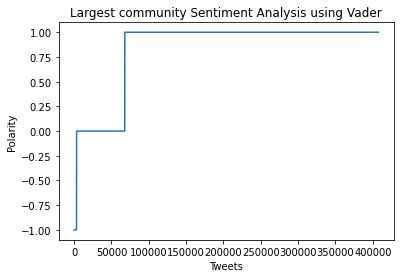

In [11]:
# plot rounded polarity
plt.plot(df.index, df['rounded_polarity'].sort_values())
plt.title('Largest community Sentiment Analysis using Vader')
plt.ylabel('Polarity')
plt.xlabel('Tweets')

In [12]:
# get amount of rounded negative, neutral, and positive polarity
num_rounded_sentiments = df.groupby('rounded_polarity').count()
num_rounded_sentiments

,created_at,id,cleaned_tweet,neg,neu,pos,compound
rounded_polarity,,,,,,,
-1,3289,3289,3289,3289,3289,3289,3289
0,64428,64428,64428,64428,64428,64428,64428
1,338314,338314,338314,338314,338314,338314,338314


Text(0, 0.5, 'Count')

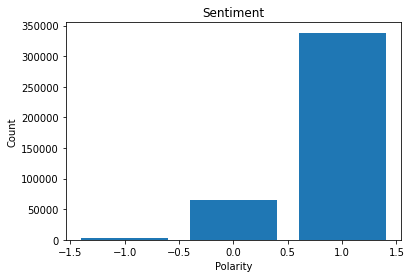

In [13]:
# plot rounded negative, neutral, and positive sentiment amounts
plt.bar(num_rounded_sentiments.index, num_rounded_sentiments["compound"])
plt.title('Sentiment')
plt.xlabel('Polarity')
plt.ylabel('Count')

# Split data into segments

In [14]:
NUM_SEGMENTS = 40

In [15]:
# split df into n groups of equal length (returns list of sub dataframes)
# https://stackoverflow.com/questions/2130016/splitting-a-list-into-n-parts-of-approximately-equal-length
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [16]:
# list of dfs
sub_dfs = list(split(df, NUM_SEGMENTS))
sub_dfs

[                      created_at                   id  \
 0      2021-05-31 23:59:42+00:00  1399515966774530048   
 1      2021-05-31 23:59:40+00:00  1399515957362450432   
 2      2021-05-31 23:59:35+00:00  1399515936093204480   
 3      2021-05-31 23:58:47+00:00  1399515734007447552   
 4      2021-05-31 23:58:44+00:00  1399515723274280960   
 ...                          ...                  ...   
 10163  2021-05-31 06:37:35+00:00  1399253706965585920   
 10164  2021-05-31 06:37:33+00:00  1399253699768176640   
 10165  2021-05-31 06:37:33+00:00  1399253698195300352   
 10166  2021-05-31 06:37:31+00:00  1399253690121277440   
 10167  2021-05-31 06:37:30+00:00  1399253689014001664   
 
                                            cleaned_tweet  neg    neu    pos  \
 0                                           good project  0.0  0.256  0.744   
 1                                    great project reset  0.0  0.328  0.672   
 2      beautiful project congratulations whole team h...  0.0

In [17]:
sub_dfs[0]

,created_at,id,cleaned_tweet,neg,neu,pos,compound,rounded_polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,0.0,0.256,0.744,0.4404,1
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,0.0,0.328,0.672,0.6249,1
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,0.0,0.251,0.749,0.9677,1
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,0.0,1.000,0.000,0.0000,0
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,0.0,0.467,0.533,0.8860,1
...,...,...,...,...,...,...,...,...
10163,2021-05-31 06:37:35+00:00,1399253706965585920,good project,0.0,0.256,0.744,0.4404,1
10164,2021-05-31 06:37:33+00:00,1399253699768176640,participating airdrop,0.0,1.000,0.000,0.0000,0
10165,2021-05-31 06:37:33+00:00,1399253698195300352,participating airdrop,0.0,1.000,0.000,0.0000,0
10166,2021-05-31 06:37:31+00:00,1399253690121277440,nice big project participating airdrop,0.0,0.588,0.412,0.4215,1


# Sentiment analysis per segment

In [18]:
def get_avg_segment_sentiment(df):
    sumsentiment = 0
    count = 0
    for i in range(len(df.index)):
        sumsentiment += df['compound'].iloc[i]
        count += 1
    return sumsentiment / count

In [19]:
# compounds = []
# firstcol = []
# for sub_df in sub_dfs:
    
#     print(sub_df.compound.mean())
#     get_avg_segment_sentiment(sub_df)

In [20]:
compounds = []
mns, mxs = [], []
for sub_df in sub_dfs:
    compounds.append(sub_df.compound.mean())
    mxs.append(sub_df.index.max())
    mns.append(sub_df.index.min())

compound_df = pd.DataFrame(dict(
    mn=mns,
    mx=mxs,
    compouned=compounds
))

In [21]:
compound_df

,mn,mx,compouned
0,0,10167,0.538924
1,10168,20331,0.388345
2,20332,30508,0.433280
3,30509,40679,0.368570
4,40680,50845,0.564512
5,50846,61013,0.586565
6,61014,71187,0.273540
7,71188,81371,0.540490
8,81372,91548,0.552415
9,91549,101709,0.365342


Text(0.5, 0, 'Segment')

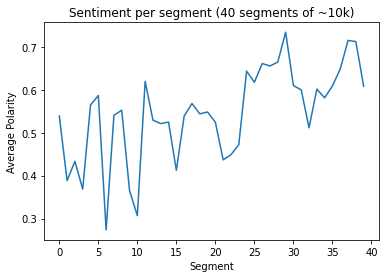

In [22]:
#plot average sentiment over time
plt.plot(compound_df.index, compound_df['compouned'])
plt.title('Sentiment per segment (40 segments of ~10k)')
plt.ylabel('Average Polarity')
plt.xlabel('Segment')